In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def str_replace_by_dict(series,str_dict):
    ''' Replacing multiple strings in a pandas seriesusing a pre-defined dictionary
    
    Input:
    series: pandas series containing the values of survery answers
    str_dict: Dictionary containing the set of string replacements
    
    Output:
    series: cleaned pandas series
    '''
    series = series.astype(str)
    for key,value in str_dict.items():
        series = series.str.replace(key,value)
    series = series.replace('nan', np.nan)
    return series

def data_processing(df,year):
    ''' Contains all the necessary data processing steps for the survey data
    
    Input:
    df: pandas dataframe containing all the response from a specific survey
    year: int. year of the survey data
    
    Output:
    df: cleaned pandas dataframe
    '''
    
    # Renaming to make standardized columns names
    col_renames = ['Employment','Country',
                   'DeveloperType','Salary',
                   'LanguageWorkedWith','DatabaseWorkedWith',
                   'PlatformWorkedWith','WebFrameWorkedWith']
    df.columns = col_renames
    
    # Subsetting the dataframe to only the Freelance respondents
    is_freelance = df['Employment'].str.contains('freelance',na=False)
    df = df.loc[is_freelance]
    
    # Convert Salary to string to remove unwanted commas before converting to float
    df['Salary'] = df['Salary'].astype(str)
    df['Salary'] = df['Salary'].str.replace(',','')    
    df['Salary'] = df['Salary'].astype(float)
    
    df['Year']=year
    
    # String replacements and mappings for various variables in the survery

    country_dict = {'United States':'U.S.',
                    'United Kingdom':'U.K.',
                    'Russian Federation':'Russia'}
    df['Country'] = df['Country'].replace(country_dict)
    
    devtype_dict = {'Developer, full-stack':'Full-stack developer',
                    'Developer, back-end':'Back-end developer',
                    'Developer, front-end':'Front-end developer',
                    'Developer, mobile':'Mobile developer'}
    df['DeveloperType'] = str_replace_by_dict(df['DeveloperType'],devtype_dict)
    
    web_dict = {'React':'React.js',
                'Angular/Angular.js':'Angular.js',
                'Angular':'Angular.js'}
    df['WebFrameWorkedWith'] = df['WebFrameWorkedWith'].replace(web_dict)

    db_dict = {'MIcrosoft Azure \(Tables, CosmosDB, SQL, etc\)':'Microsoft Azure',
               'Microsoft Azure \(Tables, CosmosDB, SQL, etc\)':'Microsoft Azure'}
    df['DatabaseWorkedWith'] = str_replace_by_dict(df['DatabaseWorkedWith'],db_dict)
    
    return df

Reading survery stackoverflow survey data from 2017 to 2019

Selected variables:
- EmploymentStatus
- Country
- DeveloperType
- Salary
- Languages worked with
- Databases worked with
- Platforms worked with
- Web Frameworks worked with

In [3]:
df_2017 = pd.read_csv('survey_results_public_2017.csv',low_memory=False)
cols_2017 = ['EmploymentStatus','Country',
             'DeveloperType','Salary','HaveWorkedLanguage',
             'HaveWorkedDatabase','HaveWorkedPlatform','HaveWorkedFramework']
df_2017 = df_2017[cols_2017]
df_2017 = data_processing(df_2017,2017)

df_2018 = pd.read_csv('survey_results_public_2018.csv',low_memory=False)
cols_2018 = ['Employment','Country',
             'DevType','Salary','LanguageWorkedWith',
             'DatabaseWorkedWith','PlatformWorkedWith','FrameworkWorkedWith']
df_2018 = df_2018[cols_2018]
df_2018 = data_processing(df_2018,2018)

df_2019 = pd.read_csv('survey_results_public_2019.csv',low_memory=False)

cols_2019 = ['Employment','Country',
             'DevType','CompTotal','LanguageWorkedWith',
             'DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith']
df_2019 = df_2019[cols_2019]
df_2019 = data_processing(df_2019,2019)

Combining all survery data into one dataframe

In [4]:
df_free = pd.concat([df_2017,df_2018,df_2019],axis=0,ignore_index=True)
df_free.to_csv('survey_data_17_to_19.csv',index=False)
print(df_free.shape)
df_free.head()

(23026, 9)


,Employment,Country,DeveloperType,Salary,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,Year
0,"Independent contractor, freelancer, or self-em...",France,Mobile developer; Desktop applications developer,NaN,Objective-C; Swift,PostgreSQL,iOS; Amazon Web Services (AWS),NaN,2017
1,"Independent contractor, freelancer, or self-em...",U.S.,Desktop applications developer,NaN,JavaScript; VB.NET,NaN,Windows Desktop,NaN,2017
2,"Independent contractor, freelancer, or self-em...",Italy,Web developer,NaN,PHP; SQL,MySQL,Windows Desktop; WordPress,NaN,2017
3,"Independent contractor, freelancer, or self-em...",Germany,NaN,NaN,C#; Java,NaN,Windows Desktop; Linux Desktop,NaN,2017
4,"Independent contractor, freelancer, or self-em...",Brazil,Web developer,NaN,JavaScript,MongoDB,NaN,Node.js; React; Firebase,2017


## Country Statistics

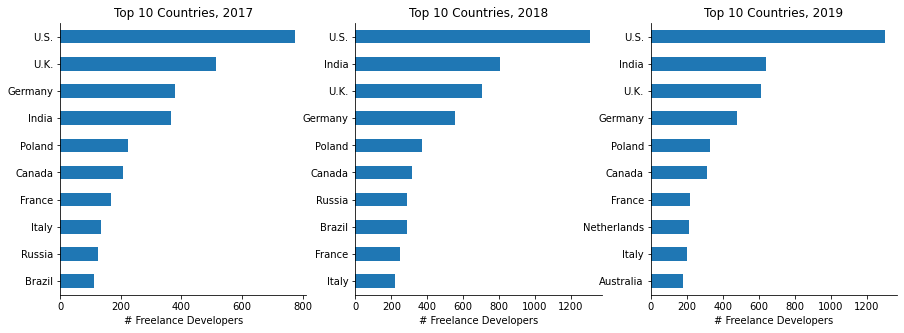

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

In [5]:
fig, ax = plt.subplots(1,3,figsize=(15,5));

i = 0
for year in [2017,2018,2019]:
    plt.figure(figsize=(3,5))
    df_year = df_free[df_free['Year']==year]
    df_year['Country'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh',ax=ax[i])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlabel('# Freelance Developers')
    ax[i].set_title('Top 10 Countries, '+str(year));
    i+=1
plt.show();

## Developer Type Statistics

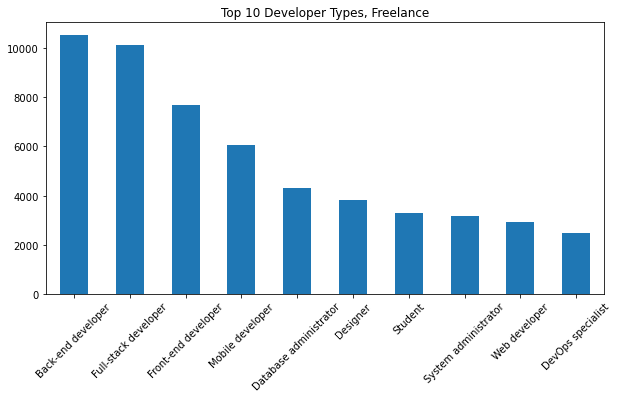

In [6]:
plt.figure(figsize=(10,5))
series = df_free['DeveloperType'].str.split(';').explode().str.strip().dropna()
series.value_counts().head(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 Developer Types, Freelance')
plt.xticks(rotation=45)
plt.show()

## Technologies Used

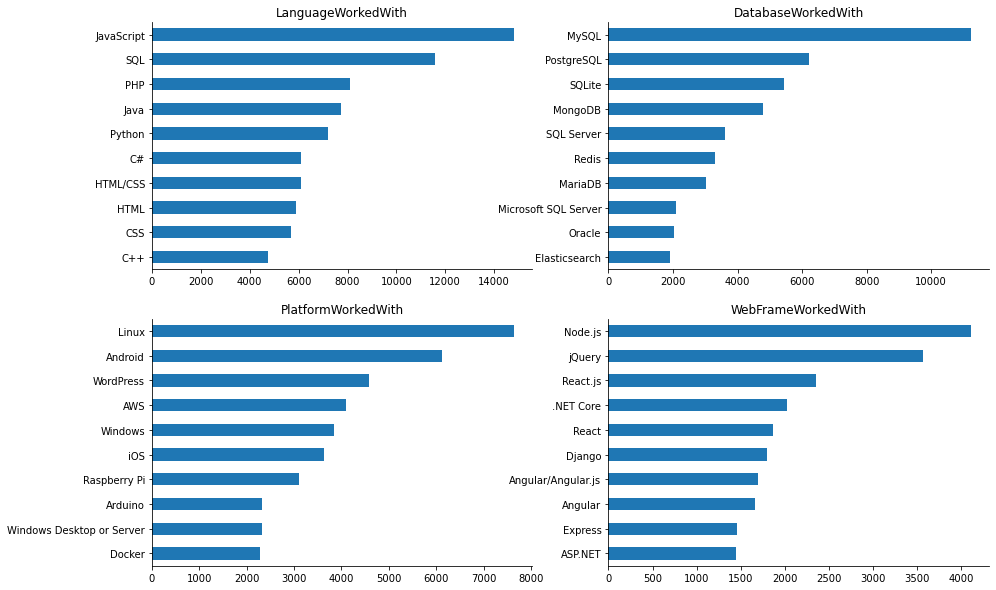

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

In [7]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

a = 0
b = 0

for col in ['LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith']:
    plt.figure(figsize=(3,5))
    series = df_free[col].str.split(';').explode().str.strip().dropna()
    series.value_counts().head(10).sort_values().plot(kind='barh',ax=ax[a,b])
    ax[a,b].spines['right'].set_visible(False)
    ax[a,b].spines['top'].set_visible(False)
    ax[a,b].set_title(str(col));
    b+=1
    if(b==2):
        b=0
        a+=1
plt.show();